In [4]:
from VAE import VAE
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import springmassdamper as smd
import copy
import time
import torch
#import animation_test
from scipy import signal

In [5]:


def plot_latent_smooth():
    test=torch.utils.data.DataLoader(d1,batch_size=len(d1), shuffle=False)
    xhat, z, x = model.test(test)
    fs=1/0.1
    fc = 1.  # Cut-off frequency of the filter
    w = fc / (fs / 2) # Normalize the frequency
    b, a = signal.butter(5, w, 'low')
    output = signal.filtfilt(b, a, z[:,0])
    output2 = signal.filtfilt(b, a, z[:,1])
    for i in range(10000,20000,1000):
        plt.plot(output[i:i+400],output2[i:i+400],'b')
    plt.plot(output[:1000],output2[:1000],'r')
    plt.plot(output[-1000:],output2[-1000:],'y')
    plt.show()


BS=2048    # Batch size for training

## Run new simulations ##
# d1, sim_length, _, _=smd.run_multimass_sim(run_nums=30,out_data=3,num_repeats=1)  # run simulation of 3 masses and a pendulum
d1, sim_length, _, _=smd.run_singlemass_sim(run_nums=30,out_data=3,num_repeats=1)   # run simulation of single mass system

## Load previously generated simulation data ##
# d1=torch.load('data_3.pt')

train=torch.utils.data.DataLoader(d1,batch_size=BS, shuffle=True)   

model=VAE(enc_out_dim=len(d1[0][0])-1,input_height=len(d1[0][0])-1)
device = torch.device("mps")    # Save the model to the CPU
model.to(device)
# model.load_state_dict(torch.load("./current_model_exp2"))     # Load a previously trained model

## Training loop ##
for i in range(100):
    loss=model.training_step(train,device)
    print(i, loss)

torch.save(model.state_dict(), 'current_model7')    # Save the current model


## Testing loop ##
model=VAE()

test=torch.utils.data.DataLoader(d1,batch_size=len(d1), shuffle=False)
xhat, z, x = model.test(test,device)





ModuleNotFoundError: No module named 'torch_geometric'

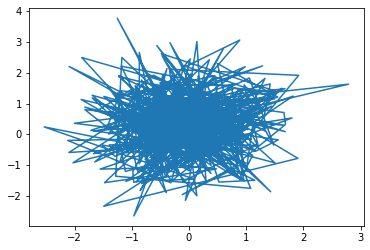

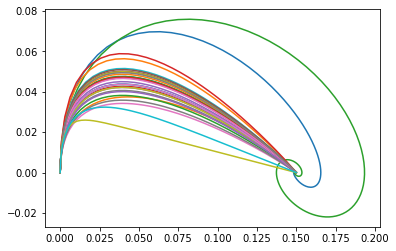

In [28]:
## Plot the latent space phase portrait ##
for i in range(1):
    plt.plot(z[i:i+sim_length,0],z[i:i+sim_length,1])
plt.show()

## Plot the state space phase portrait ##
for i in range(0,len(x),sim_length):
    plt.plot(x[i:i+sim_length,0],x[i:i+sim_length,1])
plt.show()